In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('turbines.xlsx')

In [3]:
# Get needed data, label is RD, and features are Loc and RP
df_data = df[['Offshore','Rated power','Nacelle weight']]
df_data = df_data.drop(index=[1510])
df_data.tail()

,Offshore,Rated power,Nacelle weight
1505,Yes,10000,#ND
1506,Yes,10000,#ND
1507,Yes,10000,#ND
1508,Yes,10000,#ND
1509,Yes,10000,#ND


In [4]:
drop_list = []
for i in df_data.index:
    if df_data.loc[i][2] == '#ND' or type(df_data.loc[i][2]) == str:
        drop_list.append(i)
len(drop_list)

1023

In [5]:
df_data = df_data.drop(index=drop_list)
df_data.head()

,Offshore,Rated power,Nacelle weight
1,No,20,0.5
3,No,60,1.5
4,No,100,4.8
5,No,100,3.8
6,No,100,2


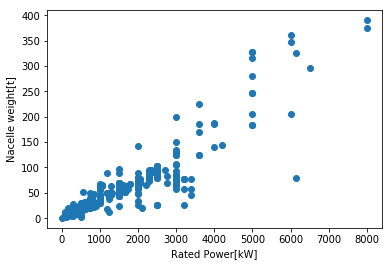

In [6]:
# a general plot to see the relationship between NW and RP
plt.scatter(df_data['Rated power'],df_data['Nacelle weight'])
plt.xlabel('Rated Power[kW]')
plt.ylabel('Nacelle weight[t]')
plt.show()

In [7]:
# change the loc of wind turbine to numeric values, where 1 means offshore and 0 means onshore
offshore = []
for i in df_data.index:
    if df_data.loc[i][0] == 'Yes':
        offshore.append(1)
    if df_data.loc[i][0] == 'No':
        offshore.append(0)
len(offshore)    

487

In [8]:
df_data['Offshore'] = offshore
df_data['bias'] = np.ravel(np.ones((df_data.shape[0],1))) # adding bias
df_data.head()

,Offshore,Rated power,Nacelle weight,bias
1,0,20,0.5,1.0
3,0,60,1.5,1.0
4,0,100,4.8,1.0
5,0,100,3.8,1.0
6,0,100,2,1.0


In [9]:
# By using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,3]] # using all the features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [11]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

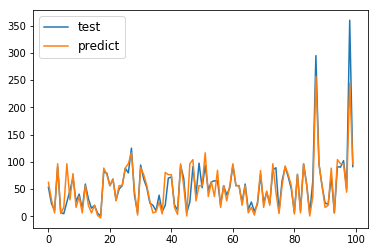

Text(0, 0.5, 'predict')

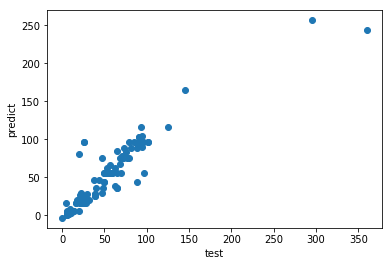

In [12]:
# plot the test dataset with the predicted one
#plt.figure(figsize=(9,6))
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
#plt.ylabel('Rotor diameter[m]',fontsize=12)
#plt.xticks(fontsize=10)
#plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [13]:
from sklearn import metrics

In [14]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

9.938466738220034 341.2936275997791 18.47413401488089


In [15]:
regr.score(x_train, y_train),regr.score(x_test, y_test),regr.coef_

(0.8239596749620199,
 0.8494472208597799,
 array([7.55393857, 0.0401334 , 0.        ]))

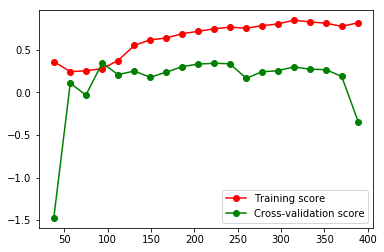

In [16]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

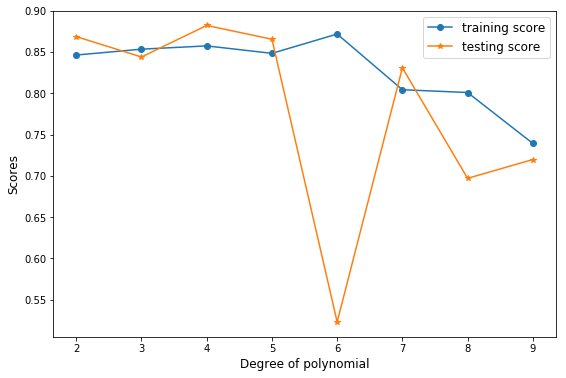

In [17]:
# adding more features by PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
x_p = X[:,[0,1]]
y_r = X[:,[2]]
train_scores = []
test_scores = []
for i in range(2,10):
    poly = PolynomialFeatures(i)
    x_prime = poly.fit_transform(x_p)
    x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    train_scores.append(regr.score(x_train,y_train))
    test_scores.append(regr.score(x_test,y_test))
    
plt.figure(figsize=(9,6))
plt.plot(range(2,10),train_scores,'o-',label = 'training score')
plt.plot(range(2,10),test_scores,'*-',label = 'testing score')
plt.legend(fontsize = 12)
plt.xlabel('Degree of polynomial',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.show()   

In [18]:
train_scores,test_scores

([0.8463526948046602,
  0.8534587025318795,
  0.8574117914079964,
  0.8483994489193956,
  0.8717739725637589,
  0.8043499650006987,
  0.80096929653651,
  0.7393306974876792],
 [0.8686334242302005,
  0.8439948578434525,
  0.8821573100968566,
  0.8654756717470725,
  0.5231249131539051,
  0.8308726567945525,
  0.6970757671932648,
  0.7198385450901215])

0.8390742265991785 0.8867572851286941


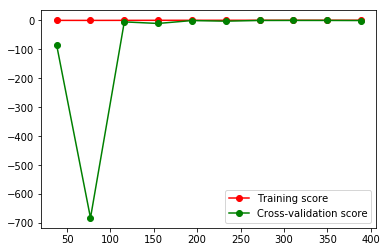

In [19]:
x_p = X[:,[0,1]]
y_r = X[:,[2]]
poly = PolynomialFeatures(2)
x_prime = poly.fit_transform(x_p)
x_train, x_test, y_train, y_test = train_test_split(x_prime,y_r)
regr = LinearRegression()
regr.fit(x_train,y_train)
print(regr.score(x_train, y_train),regr.score(x_test, y_test))

train_sizes, train_scores, valid_scores = learning_curve(regr, x_prime, y_r, train_sizes=np.linspace(0.1, 1.0, 10),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()


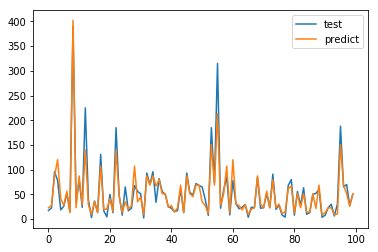

Text(0, 0.5, 'predict')

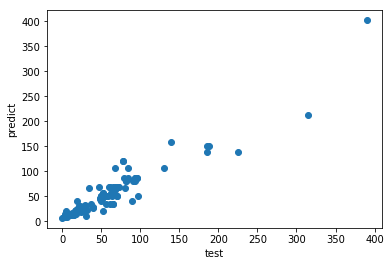

In [20]:
y_pred_LR = regr.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [21]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

10.797715159430089 357.3198561437388 18.90290602377684


In [22]:
x_1 = [[0,2000]]
poly = PolynomialFeatures(2)
x_2 = poly.fit_transform(x_1)
regr.predict(x_2)

array([[68.76535366]])

In [23]:
x_1 = [[0,3450]]
poly = PolynomialFeatures(2)
x_2 = poly.fit_transform(x_1)
regr.predict(x_2)

array([[126.15073306]])

In [24]:
x_1 = [[0,3000]]
poly = PolynomialFeatures(2)
x_2 = poly.fit_transform(x_1)
regr.predict(x_2)

array([[107.26222302]])

In [25]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor

parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, np.ravel(y_train))
y_pred_RF = RF_model.predict(x_test)

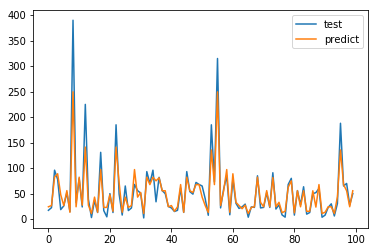

Text(0, 0.5, 'predict')

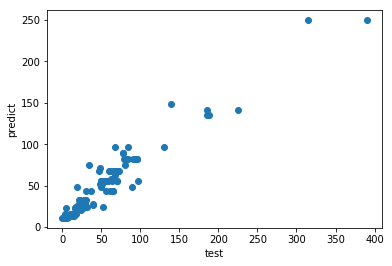

In [26]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [27]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

11.054202480652119 441.21848206268163 21.00520130973949


In [28]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.8368149451047646, 0.860167919859244)

In [29]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'adam', 
            'activation':'relu',
            'alpha':1e-5,
            'hidden_layer_sizes': (20,20), 
            'random_state':50,
            'max_iter':100,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (10,20)) # number of hidden layers
mlp.fit(x_train,np.ravel(y_train))
y_pred_NN = mlp.predict(x_test)

Iteration 1, loss = 8619307590625.48242188
Iteration 2, loss = 708054196778.51904297
Iteration 3, loss = 933249394209.44274902
Iteration 4, loss = 184248197863.01770020
Iteration 5, loss = 410953900891.03546143
Iteration 6, loss = 97093252925.27876282
Iteration 7, loss = 163111561400.11285400
Iteration 8, loss = 5930749029.06787205
Iteration 9, loss = 37371723388.78955841
Iteration 10, loss = 36755768373.87968445
Iteration 11, loss = 9145749685.92851639
Iteration 12, loss = 1804264921.07486176
Iteration 13, loss = 17131855049.18703461
Iteration 14, loss = 22574816828.27821350
Iteration 15, loss = 8146821086.72056389
Iteration 16, loss = 6163685715.83976078
Iteration 17, loss = 10701915671.72452164
Iteration 18, loss = 1630407710.25385475
Iteration 19, loss = 6574225191.93206692
Iteration 20, loss = 3476539163.19080305
Iteration 21, loss = 467869177.03080988
Iteration 22, loss = 911795964.01747799
Iteration 23, loss = 2332859301.60280323
Iteration 24, loss = 1932206180.40770149
Iteratio

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


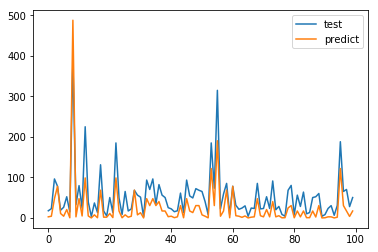

Text(0, 0.5, 'predict')

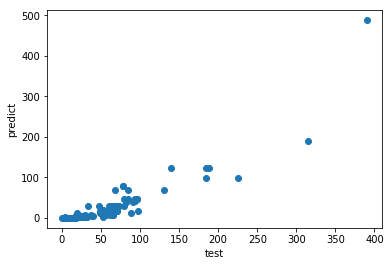

In [30]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_NN)
plt.xlabel('test')
plt.ylabel('predict')

In [31]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

29.870417820137714 1410.474661325862 37.55628657529738


In [32]:
mlp.score(x_train,y_train),mlp.score(x_test,y_test)

(0.5826460198343635, 0.5529887937672472)

In [33]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)


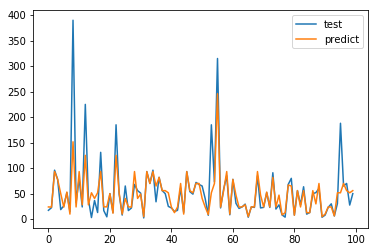

Text(0, 0.5, 'predict')

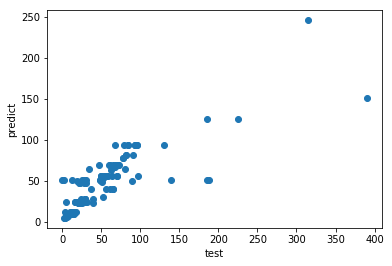

In [34]:
svr_rbf.fit(x_train,np.ravel(y_train))
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [35]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

14.763734128579577 1166.3709084820744 34.1521728222682


In [36]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.7683278274464631, 0.6303507740966718)

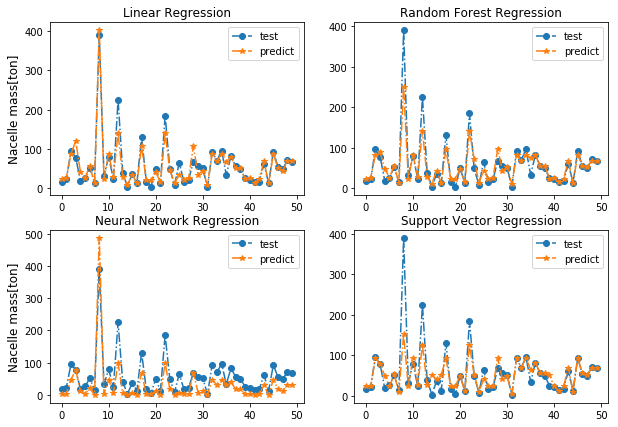

In [37]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Nacelle mass[ton]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(222)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.subplot(223)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_NN[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Nacelle mass[ton]',fontsize=12)
plt.legend()
plt.title('Neural Network Regression')

plt.subplot(224)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_svr_rbf[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Support Vector Regression')

plt.show()

In [38]:
# feature extraction, adding new features P**0.5 ,log(P) and P**2
df_data['P_sqrt'] = df_data['Rated power']**0.5
df_data['P_log'] = np.log(list(df_data['Rated power']))
df_data['P_square'] = df_data['Rated power']**2
df_data['1/P'] = 1/df_data['Rated power']
#df_data['R_sqrt'] = [float(i)**0.5 for i in list(df_data['Rotor diameter'])]
#df_data['R_log'] = [np.log(float(i)) for i in list(df_data['Rotor diameter'])]
#df_data['R_square'] = [float(i)**2 for i in list(df_data['Rotor diameter'])]
df_data.head()

,Offshore,Rated power,Nacelle weight,bias,P_sqrt,P_log,P_square,1/P
1,0,20,0.5,1.0,4.47214,2.995732,400,0.05
3,0,60,1.5,1.0,7.74597,4.094345,3600,0.0166667
4,0,100,4.8,1.0,10,4.605170,10000,0.01
5,0,100,3.8,1.0,10,4.605170,10000,0.01
6,0,100,2,1.0,10,4.605170,10000,0.01


In [39]:
# feature selection
from sklearn.ensemble import ExtraTreesRegressor
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,3,4,5,6,7]]
model = ExtraTreesRegressor()
model.fit(x, y)
print(model.feature_importances_)

[0.03943261 0.25145679 0.         0.19665766 0.11399164 0.31914501
 0.07931629]


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
from sklearn.feature_selection import RFE
model=LinearRegression() # LinearRegression Model as Estimator

rfe=RFE(model,3)# using 3 features

fit=rfe.fit(x,y)
print( "Feature Ranking(liner): %s" % (fit.ranking_))

Feature Ranking(liner): [1 3 5 2 1 4 1]


In [41]:
# after feature selection
X = df_data.values.copy()
y = X[:,2]
x = X[:,[0,1,4,6,7]] # using selected features
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [42]:
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred_LR = regr.predict(x_test)

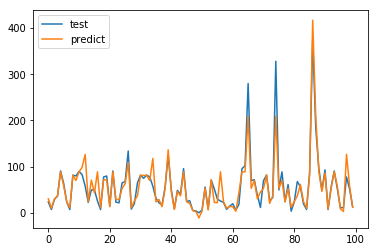

Text(0, 0.5, 'predict')

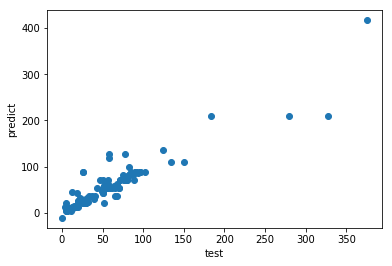

In [43]:
# plot the test dataset with the predicted one
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_LR[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_LR)
plt.xlabel('test')
plt.ylabel('predict')

In [44]:
from sklearn import metrics

In [45]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
print(MAE_LR, MSE_LR, RMSE_LR)

11.062669201892014 427.9615278556146 20.68723103403678


In [46]:
regr.score(x_train, y_train),regr.score(x_test, y_test)

(0.8466953320284899, 0.8623404242309276)

In [47]:
# plot the learning curve to see how the model performs
from sklearn.model_selection import learning_curve

In [48]:
train_sizes, train_scores, valid_scores = learning_curve(regr, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)#,scoring = 'neg_mean_squared_error')

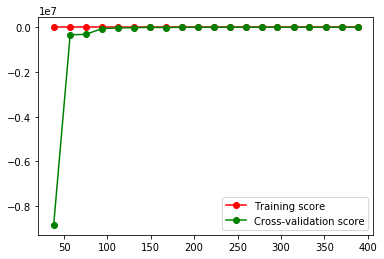

In [49]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [50]:
# By using Random Forest
from sklearn.ensemble import RandomForestRegressor
parameters = {'bootstrap': True,
              'min_samples_leaf': 8,
              'n_estimators': 600, # change the number of trees
              'min_samples_split': 12,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

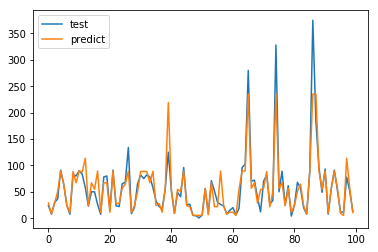

Text(0, 0.5, 'predict')

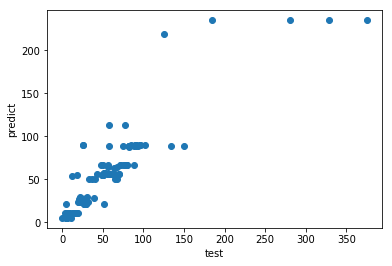

In [51]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_RF[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_RF)
plt.xlabel('test')
plt.ylabel('predict')

In [52]:
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
print(MAE_RF,MSE_RF,RMSE_RF)

12.378609977739957 581.3104294525523 24.11038011837541


In [53]:
RF_model.score(x_train, y_train),RF_model.score(x_test, y_test)

(0.835734327514418, 0.813013689549277)

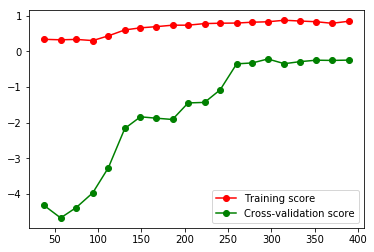

In [54]:
train_sizes, train_scores, valid_scores = learning_curve(RF_model, x, y, train_sizes=np.linspace(0.1, 1.0, 20),cv = 5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [55]:
train_scores_mean

array([0.33664926, 0.32317657, 0.33411168, 0.30139758, 0.43389867,
       0.60021059, 0.65887203, 0.69149078, 0.73322267, 0.73371781,
       0.77798758, 0.78893273, 0.7933052 , 0.81688809, 0.82899148,
       0.87216023, 0.850205  , 0.82987872, 0.78659962, 0.84287257])

In [56]:
test_scores_mean

array([-4.32792012, -4.67663744, -4.38492252, -3.97328837, -3.26932507,
       -2.16558331, -1.83860583, -1.87685534, -1.91338273, -1.44900109,
       -1.43413486, -1.07964824, -0.35173035, -0.32639184, -0.21519252,
       -0.34766503, -0.28999887, -0.24885499, -0.25579156, -0.24705949])

In [57]:
# by using SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

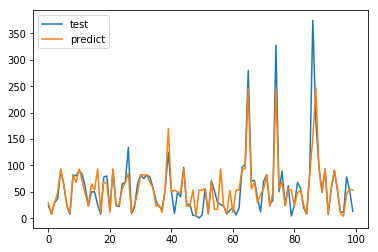

Text(0, 0.5, 'predict')

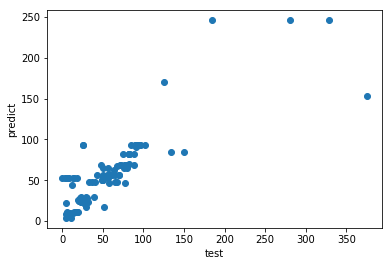

In [58]:
svr_rbf.fit(x_train,y_train)
y_pred_svr_rbf = svr_rbf.predict(x_test)
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_svr_rbf[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_svr_rbf)
plt.xlabel('test')
plt.ylabel('predict')

In [59]:
MAE_SVR1=metrics.mean_absolute_error(y_test,y_pred_svr_rbf) 
MSE_SVR1=metrics.mean_squared_error(y_test,y_pred_svr_rbf)  
RMSE_SVR1= np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr_rbf))
print(MAE_SVR1,MSE_SVR1,RMSE_SVR1)

14.226850021369328 865.6808383248598 29.42245466178612


In [60]:
svr_rbf.score(x_train,y_train),svr_rbf.score(x_test,y_test)

(0.7895916391602807, 0.7215421265730679)

In [61]:
# by Neural network
from sklearn.neural_network import MLPRegressor

parameters={ 'solver':'adam', 
            'activation':'relu',
            'alpha':1e-4,
            'hidden_layer_sizes': (15,15), 
            'random_state':10,
            'max_iter':100,
            'verbose':10,
            'learning_rate_init':.1}
mlp = MLPRegressor(**parameters) 
#mlp=MLPClassifier() # another way

#mlp = MLPRegressor(hidden_layer_sizes = (10,10)) # number of hidden layers
mlp.fit(x_train,y_train)
y_pred_NN = mlp.predict(x_test)

Iteration 1, loss = 1592828953853.81958008
Iteration 2, loss = 727076841652.64782715
Iteration 3, loss = 49072102198.76732635
Iteration 4, loss = 38818384236.35608673
Iteration 5, loss = 2978772380.68336296
Iteration 6, loss = 332613109.82077593
Iteration 7, loss = 967886594.92489231
Iteration 8, loss = 804620663.84539557
Iteration 9, loss = 923986273.22891307
Iteration 10, loss = 866086880.50579882
Iteration 11, loss = 667285976.80842781
Iteration 12, loss = 283601306.70107967
Iteration 13, loss = 367062840.44813734
Iteration 14, loss = 589102098.98406971
Iteration 15, loss = 350235305.18138504
Iteration 16, loss = 243698716.58306840
Iteration 17, loss = 357594889.05011970
Iteration 18, loss = 61652600.01229711
Iteration 19, loss = 106805558.93650398
Iteration 20, loss = 132054489.34617293
Iteration 21, loss = 31238006.48506733
Iteration 22, loss = 102342622.59937483
Iteration 23, loss = 55621522.73091452
Iteration 24, loss = 54349852.29489826
Iteration 25, loss = 72576128.97248498
It

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


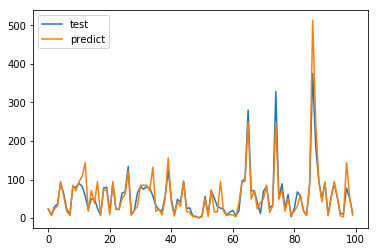

Text(0, 0.5, 'predict')

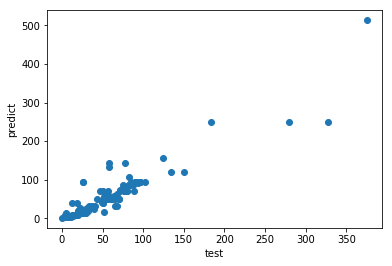

In [62]:
plt.plot(y_test[0:100],label='test')
plt.plot(y_pred_NN[0:100],label='predict')
plt.legend()
plt.show()
plt.scatter(y_test,y_pred_NN)
plt.xlabel('test')
plt.ylabel('predict')

In [63]:
mlp.score(x_train,y_train),mlp.score(x_test,y_test)

(0.8002122882940484, 0.8121541779222161)

In [64]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
print(MAE_NN,MSE_NN,RMSE_NN)

12.80989533392662 583.9825131566581 24.165730139117628


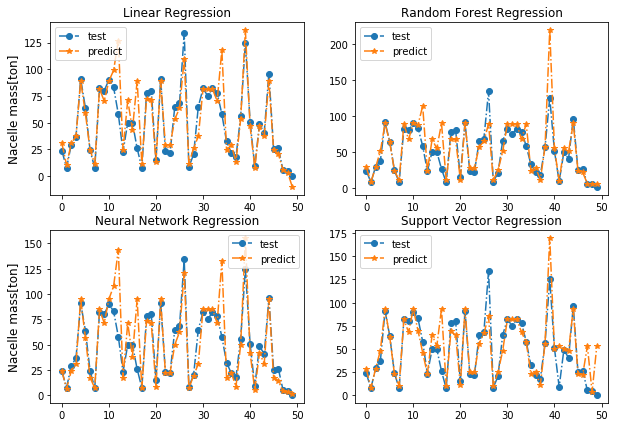

In [65]:
plt.figure(figsize=(10,7))
plt.subplot(221)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_LR[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Nacelle mass[ton]',fontsize=12)
plt.legend()
plt.title('Linear Regression')

plt.subplot(222)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_RF[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Random Forest Regression')

plt.subplot(223)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_NN[0:50],'-.*',markersize=6,label='predict')
plt.ylabel('Nacelle mass[ton]',fontsize=12)
plt.legend()
plt.title('Neural Network Regression')

plt.subplot(224)
plt.plot(y_test[0:50],'-.o',markersize=6,label='test')
plt.plot(y_pred_svr_rbf[0:50],'-.*',markersize=6,label='predict')
plt.legend()
plt.title('Support Vector Regression')

plt.show()